# Analysing relation between academic stress and smartphone dependence

## Discription:
Linear regression analysis was used to investigate the relationship among the variables. The results showed that academic stress was positively related to psychological distress, which may further lead to severe smartphone dependence. Psychological distress partially mediated the relationship between academic stress and smartphone dependence. The mediating effect of psychological distress between academic stress and smartphone dependence was moderated by academic resilience. Specifically, academic resilience weakened the indirect relationship between academic stress and smartphone dependence that was mediated by psychological distress. 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Exploring the Data

In [2]:
df = pd.read_csv('smartphone_dependency.csv')

In [3]:
df.head()

,Pcode,age,sex,as,pd,ar,ma,INT
0,CXCXGJW103,17,1,1.714286,4.583333,3.900000,2.941176,-0.110501
1,CXRCOL205,16,2,2.142857,1.000000,4.466667,2.000000,-0.276732
2,GCRCLX212,16,2,2.714286,1.750000,4.033333,2.000000,0.047242
3,GDCHLL212,17,2,3.000000,1.416667,3.168989,1.941176,-0.275906
4,GDDGLT209,17,2,2.714286,2.666667,3.533333,1.764706,-0.041050


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 8 columns):
Pcode    49 non-null object
age      49 non-null int64
sex      49 non-null int64
as       49 non-null float64
pd       49 non-null float64
ar       49 non-null float64
ma       49 non-null float64
INT      49 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 3.1+ KB


In [5]:
df.drop('Pcode', axis = 1, inplace = True)

In [6]:
df.head()

,age,sex,as,pd,ar,ma,INT
0,17,1,1.714286,4.583333,3.900000,2.941176,-0.110501
1,16,2,2.142857,1.000000,4.466667,2.000000,-0.276732
2,16,2,2.714286,1.750000,4.033333,2.000000,0.047242
3,17,2,3.000000,1.416667,3.168989,1.941176,-0.275906
4,17,2,2.714286,2.666667,3.533333,1.764706,-0.041050


In [7]:
df.describe()

,age,sex,as,pd,ar,ma,INT
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,16.142857,1.693878,2.571429,2.270478,3.792933,2.681922,-0.113795
std,0.677003,0.465657,0.432522,1.048347,0.522783,0.826148,0.208498
min,14.000000,1.000000,1.428571,1.000000,2.400000,1.176471,-0.888263
25%,16.000000,1.000000,2.285714,1.583333,3.483368,2.000000,-0.201807
50%,16.000000,2.000000,2.571429,1.916667,3.766667,2.647059,-0.041050
75%,17.000000,2.000000,2.857143,3.166667,4.066667,3.294118,0.001717
max,17.000000,2.000000,3.428571,4.833333,4.766667,4.529412,0.144434


In [8]:
df.columns

Index(['age', 'sex', 'as', 'pd', 'ar', 'ma', 'INT'], dtype='object')

# Standardising the data

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_features = scaler.transform(df)

In [13]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns)
df_feat.head()

,age,sex,as,pd,ar,ma,INT
0,1.279204,-1.505545,-2.002270,2.229056,0.206925,0.317063,0.015965
1,-0.213201,0.664211,-1.001136,-1.224446,1.302101,-0.833978,-0.789577
2,-0.213201,0.664211,0.333713,-0.501620,0.464612,-0.833978,0.780374
3,1.279204,0.664211,1.001136,-0.822876,-1.205873,-0.905919,-0.785574
4,1.279204,0.664211,0.333713,0.381834,-0.501719,-1.121738,0.352516


# Exploratory Data Analysis

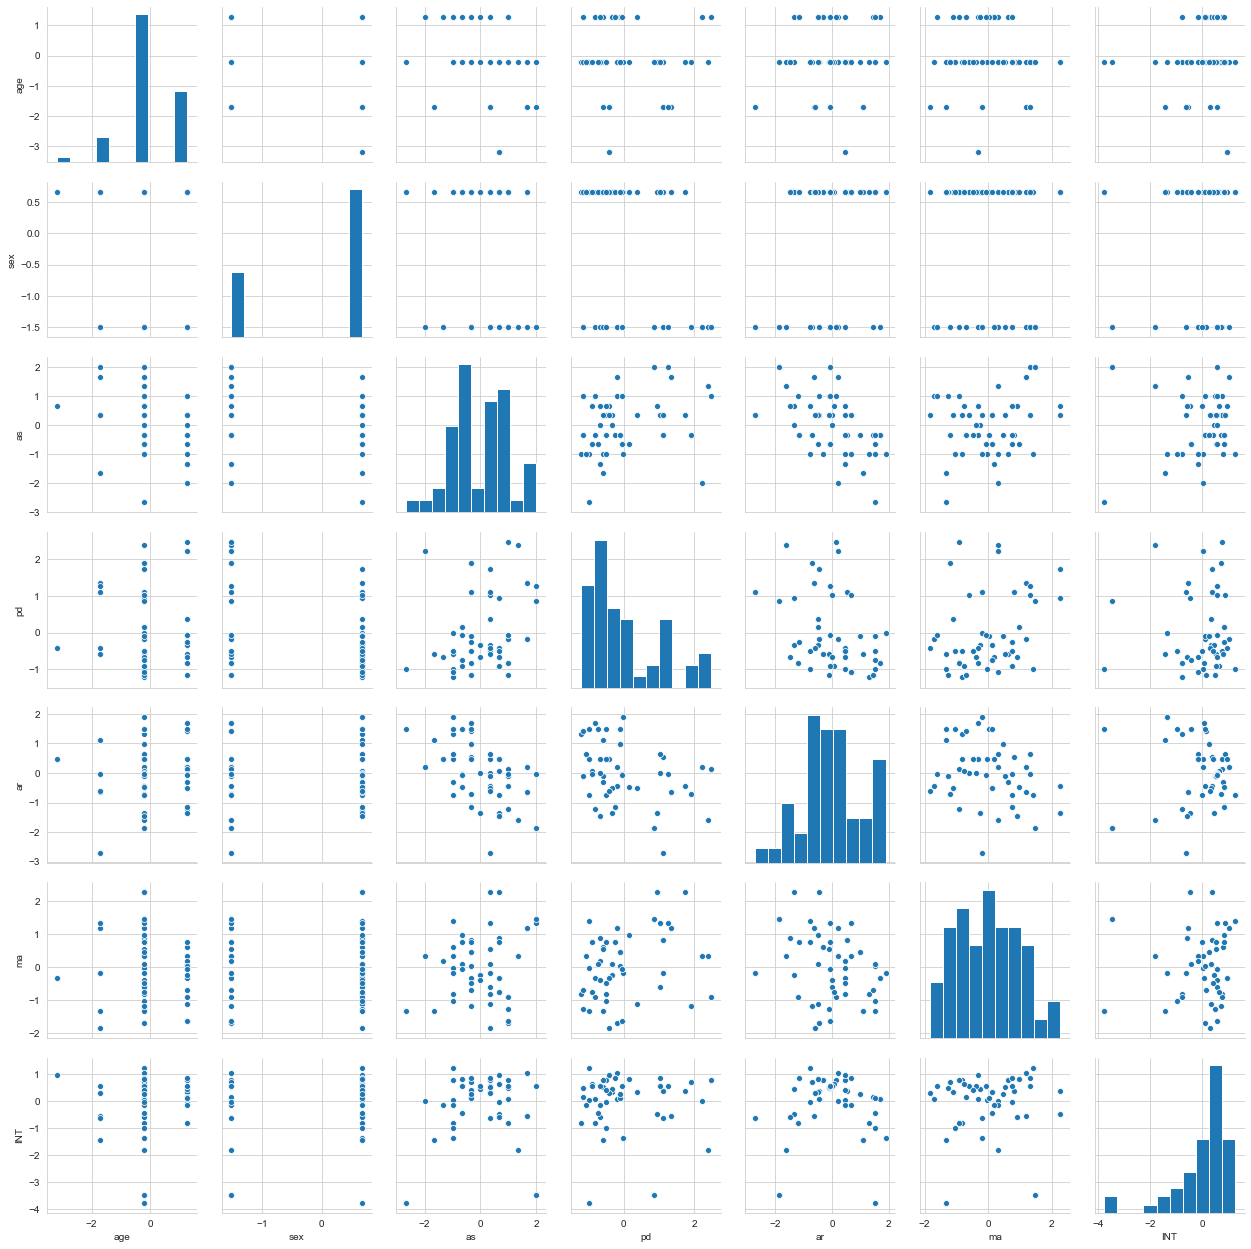

In [14]:
sns.set_style('whitegrid')
sns.pairplot(df_feat)

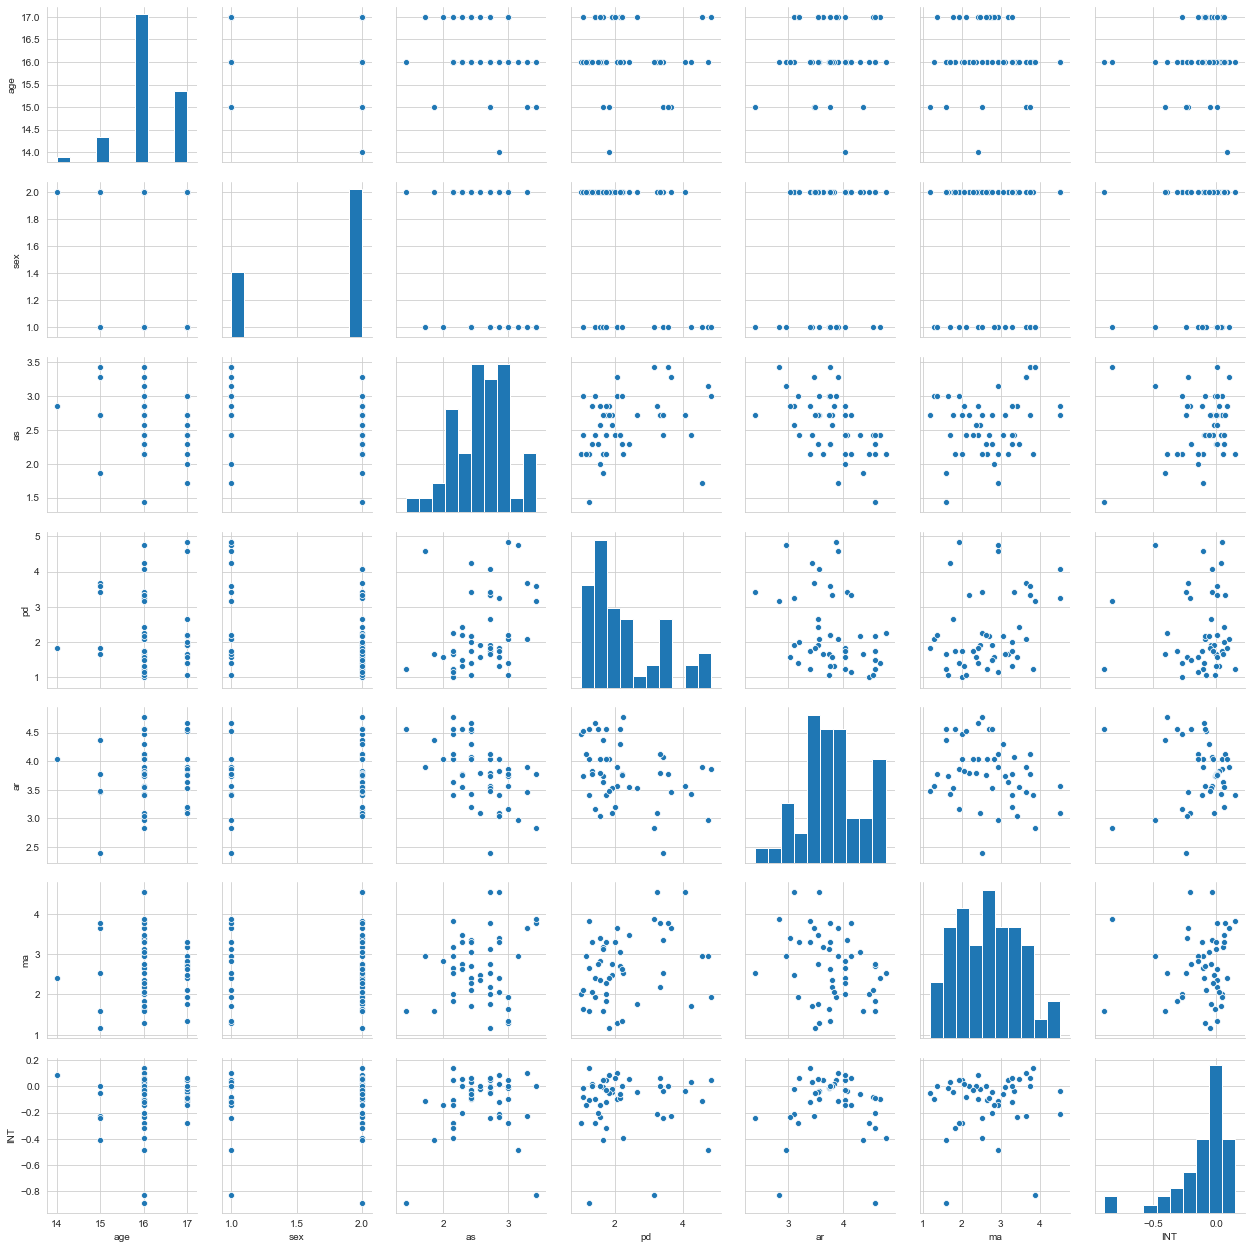

In [15]:
sns.set_style('whitegrid')
sns.pairplot(df)

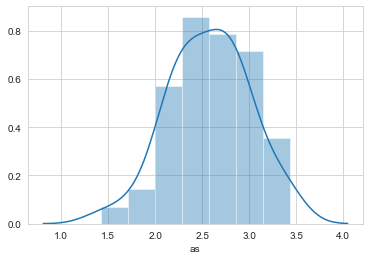

In [16]:
sns.distplot(df['as'])

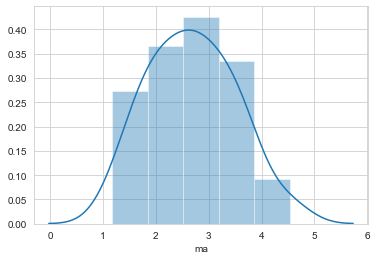

In [17]:
sns.distplot(df['ma'])

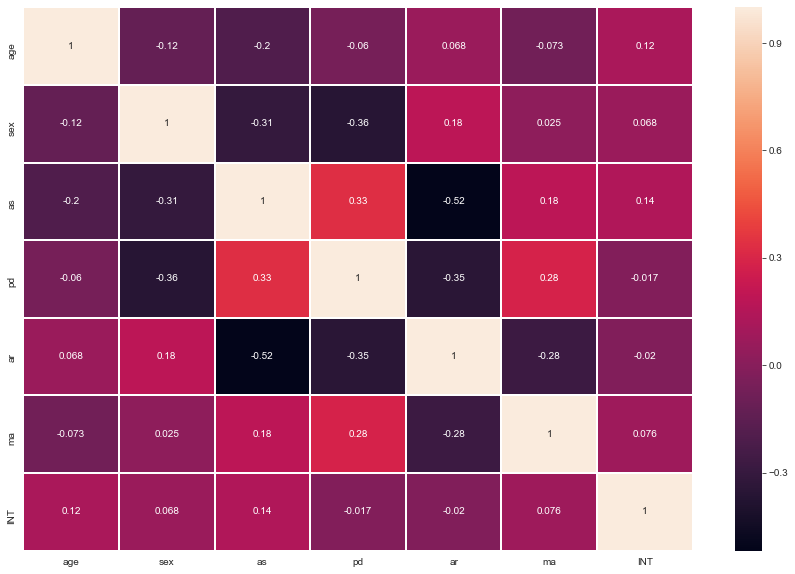

In [18]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True,linewidths=1, linecolor='white',)

## Training a Linear Regression Model

### X and y arrays

In [19]:
df.columns

Index(['age', 'sex', 'as', 'pd', 'ar', 'ma', 'INT'], dtype='object')

In [20]:
X = df_feat[['age', 'sex', 'pd', 'ar', 'ma', 'INT']]
y = df_feat['as']

## Train Test Split


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Creating and Training the Model

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()

In [25]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation


In [26]:
# print the intercept
print(lm.intercept_)

-0.1514040152457378


In [202]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,-0.110669
sex,-0.291018
pd,-0.074306
ar,-0.426588
ma,-0.033088
INT,0.216240


Interpreting the coefficients:

## Predictions from our Model


In [203]:
predictions = lm.predict(X_test)

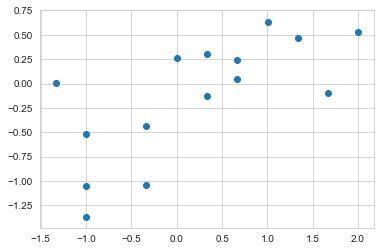

In [204]:
plt.scatter(y_test,predictions)

**Residual Histogram**

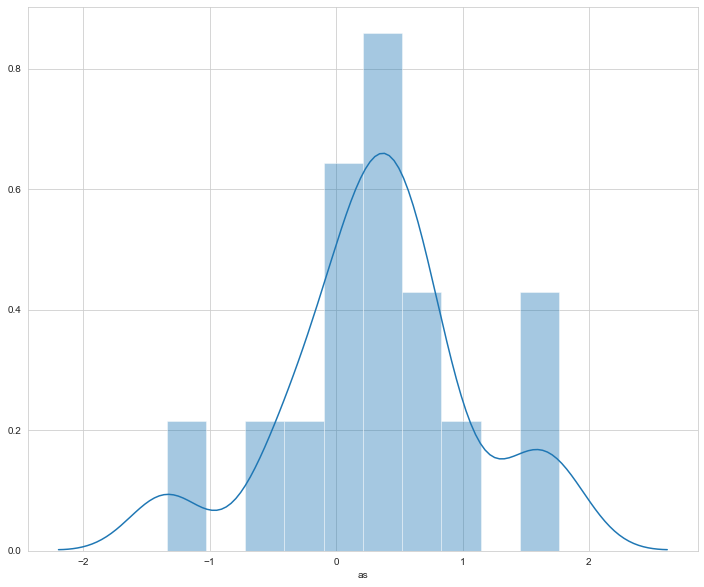

In [205]:
plt.figure(figsize = (12,10))
sns.distplot((y_test-predictions),bins=10);

## Regression Evaluation Metrics
**Mean Absolute Error** (MAE)
**Mean Squared Error** (MSE)
**Root Mean Squared Error** (RMSE)

In [206]:
from sklearn import metrics

In [207]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.6218819547346789
MSE: 0.6473686824314753
RMSE: 0.8045922460672085
